In [1]:

# Import necessary libraries

%matplotlib inline

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 
import sklearn

Location = r'books_1.Best_Books_Ever.csv'

df = pd.read_csv(Location, sep=',')
df.head(5)

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


#### Preprocessing / Cleaning


In [2]:
df.replace('', np.nan, inplace=True)
df = df.dropna()
df.head(5)

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
8,30.J_R_R_Tolkien_4_Book_Boxed_Set,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,The Lord of the Rings #0-3,J.R.R. Tolkien,4.60,"This four-volume, boxed set contains J.R.R. To...",English,9780345538376,"['Fantasy', 'Fiction', 'Classics', 'Adventure'...","['Frodo Baggins', 'Gandalf', 'Bilbo Baggins', ...",...,10/20/55,[],110146,"['78217', '22857', '6628', '1477', '967']",98.0,['Middle-earth'],https://i.gr-assets.com/images/S/compressed.ph...,1159802,12111,21.15
29,375802.Ender_s_Game,Ender's Game,Ender's Saga #1,"Orson Scott Card, Stefan Rudnicki (Narrator), ...",4.30,"Andrew ""Ender"" Wiggin thinks he is playing com...",English,9780812550702,"['Science Fiction', 'Fiction', 'Young Adult', ...","['Dink', 'Bernard', 'Valentine Wiggin', 'Peter...",...,10/28/85,"['Hugo Award for Best Novel (1986)', 'Nebula A...",1131303,"['603209', '339819', '132305', '35667', '20303']",95.0,[],https://i.gr-assets.com/images/S/compressed.ph...,720651,7515,4.6
37,17245.Dracula,Dracula,Dracula #1,"Bram Stoker, Nina Auerbach (Editor), David J. ...",4.00,You can find an alternative cover edition for ...,English,9780393970128,"['Classics', 'Horror', 'Fiction', 'Fantasy', '...","['Jonathan Harker', 'Lucy Westenra', 'Abraham ...",...,05/26/97,[],938325,"['345260', '329217', '197206', '48642', '18000']",93.0,"['Transylvania (Romania)', 'Budapest (Hungary)...",https://i.gr-assets.com/images/S/compressed.ph...,646782,6988,4.55
42,28187.The_Lightning_Thief,The Lightning Thief,Percy Jackson and the Olympians #1,Rick Riordan (Goodreads Author),4.26,Alternate cover for this ISBN can be found her...,English,9780786838653,"['Fantasy', 'Young Adult', 'Mythology', 'Ficti...","['Annabeth Chase', 'Grover Underwood', 'Luke C...",...,06/28/05,"[""Young Readers' Choice Award (2008)"", 'Books ...",1992300,"['1006885', '604999', '289310', '64014', '27092']",95.0,"['New York City, New York (United States)', 'M...",https://i.gr-assets.com/images/S/compressed.ph...,597132,6370,1.79


In [3]:
# Split ratings by stars

rating_list = [f"ratingStar{i}" for i in range(5,0, -1)]

df[rating_list] = df["ratingsByStars"].str.replace(" ", "").str.replace("[", "").str.replace("]", "").str.split(',', expand=True)

for rating in rating_list:
    df[rating] = df[rating].str.replace("'", "").astype(int)

In [4]:
df.head(2)

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,setting,coverImg,bbeScore,bbeVotes,price,ratingStar5,ratingStar4,ratingStar3,ratingStar2,ratingStar1
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.5,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38,1593642,637516,222366,39573,14526
8,30.J_R_R_Tolkien_4_Book_Boxed_Set,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,The Lord of the Rings #0-3,J.R.R. Tolkien,4.6,"This four-volume, boxed set contains J.R.R. To...",English,9780345538376,"['Fantasy', 'Fiction', 'Classics', 'Adventure'...","['Frodo Baggins', 'Gandalf', 'Bilbo Baggins', ...",...,['Middle-earth'],https://i.gr-assets.com/images/S/compressed.ph...,1159802,12111,21.15,78217,22857,6628,1477,967


In [5]:
# Deleting books with empty genres

condition = df["genres"] != '[]'
df = df[condition]

In [6]:
# Create single genre category

df["genreSingle"] = df["genres"].apply(lambda x: x.split(',')[0].replace("[", "").replace("'", ""))
df["genreSingle"].head(5)

1             Fantasy
8             Fantasy
29    Science Fiction
37           Classics
42            Fantasy
Name: genreSingle, dtype: object

In [7]:
# Create publish Year

df["publishYear"] = pd.to_datetime(df["publishDate"], errors='coerce').dt.year
df["publishYear"]


/tmp/ipykernel_424/3945411462.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["publishYear"] = pd.to_datetime(df["publishDate"], errors='coerce').dt.year


1        2004.0
8        2012.0
29       2004.0
37       1986.0
42       2006.0
          ...  
52135    2016.0
52179    2003.0
52232    2012.0
52263    2001.0
52403    2009.0
Name: publishYear, Length: 782, dtype: float64

### Extracting Information from Graphs - Giving answers to problems



#### Ratings Histogram


<Axes: xlabel='rating', ylabel='Count'>

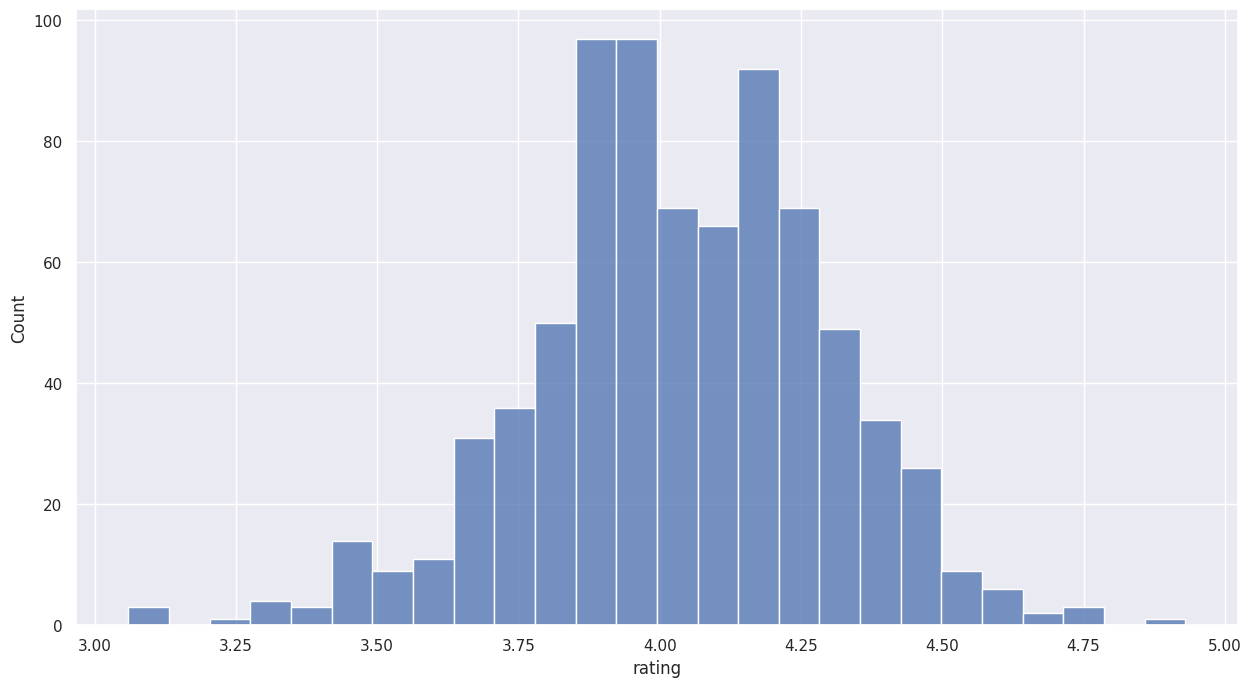

In [8]:
sb.set(rc={"figure.figsize":(15, 8)})

sb.histplot(df["rating"])

#### The 10 Books with most pages


<Axes: xlabel='title', ylabel='pages'>

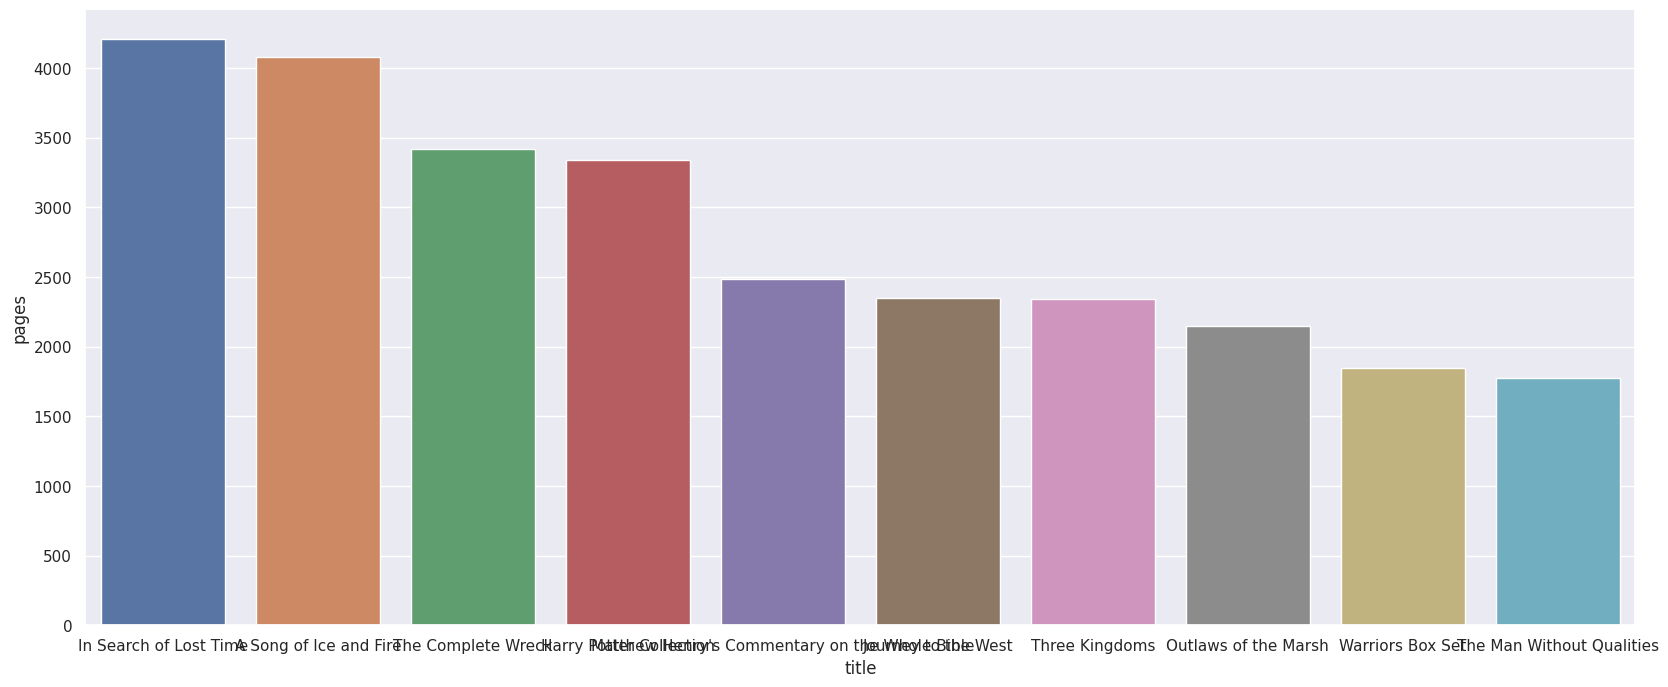

In [9]:
sb.set(rc={"figure.figsize":(20, 8)})

df["pages"] = df["pages"].astype(int)

new_df = df.sort_values(by="pages", ascending=False).iloc[0:10]

sb.barplot(data=new_df, x=new_df["title"], y=new_df["pages"].astype(int))

#### Books with Most 5 Stars

<Axes: xlabel='title', ylabel='ratingStar5'>

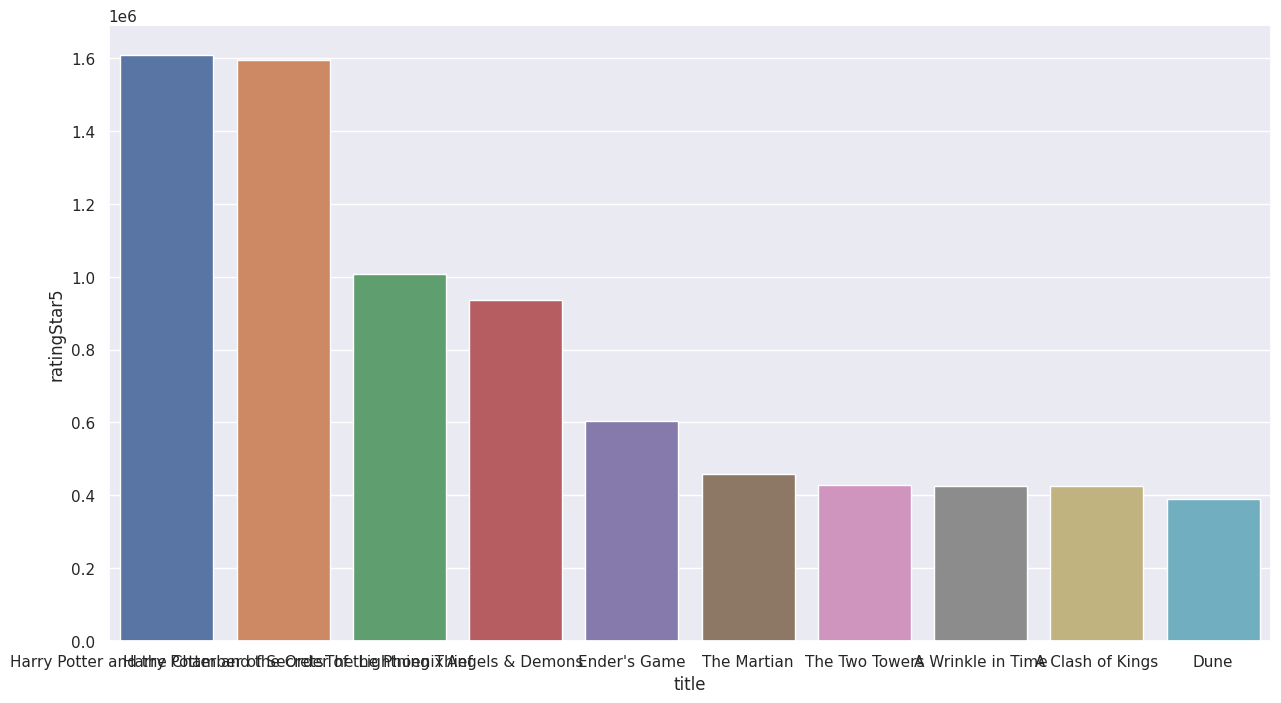

In [10]:
sb.set(rc={"figure.figsize": (15, 8)})

most_five_stars = df["ratingStar5"] >= 10000
new_df = df[most_five_stars]

new_df = new_df.sort_values(by="ratingStar5", ascending=False).iloc[0:10]
sb.barplot(data=new_df, x = new_df["title"], y = new_df["ratingStar5"])



#### Word Frequency

Text(0.5, 1.0, 'Word Frequency')

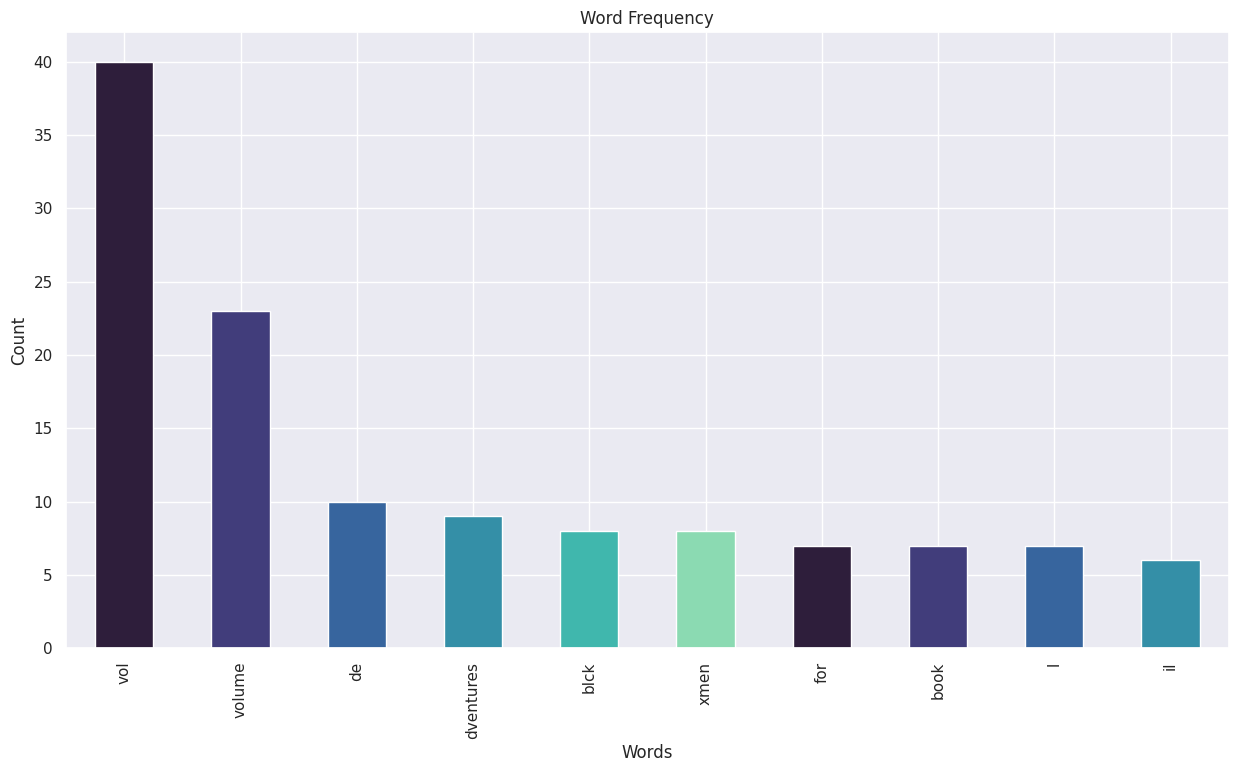

In [11]:
sb.set(rc={"figure.figsize": (15, 8)})

stop_words_removed = df["title"].apply(lambda x: x.lower().replace("and", "").replace("is", "").replace("the", "") \
                                    .replace("of", "").replace("in", "").replace("&", "").replace("/", "").replace("to", "") \
                                    .replace("a", "").replace("on", "").replace("-", "").replace("1", "").replace(":", "") \
                                    .replace("2", "").replace(",", "").replace(".", ""))
all_words = ''.join(stop_words_removed)

word_count = pd.Series(all_words.split()).value_counts().iloc[0:10]
colors = sb.color_palette("mako")
word_count.plot.bar(color=colors)

plt.xlabel("Words")
plt.ylabel("Count")
plt.title("Word Frequency")

#### Authors with Most Books

Text(0.5, 1.0, 'Authors with Most Books')

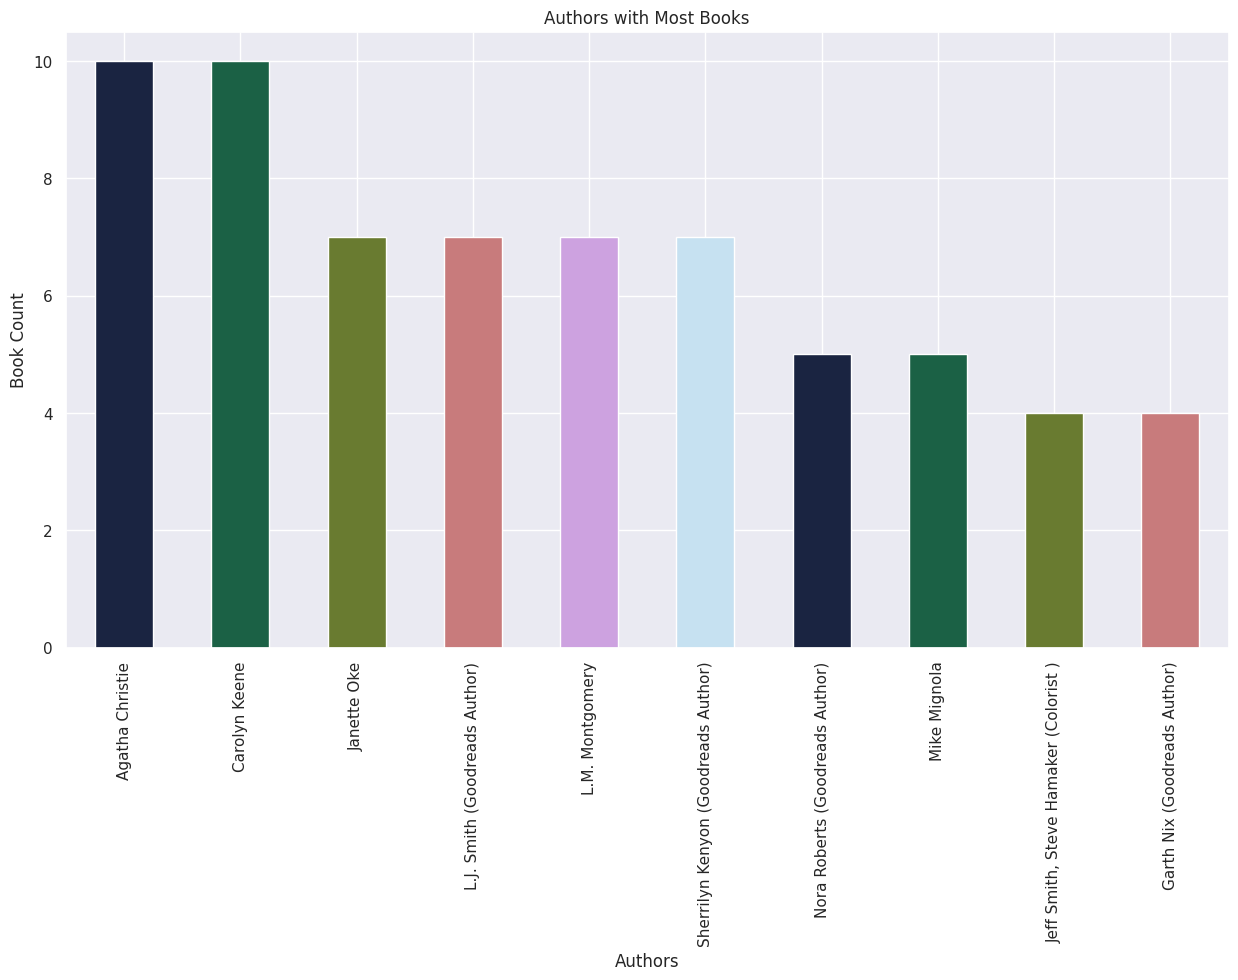

In [12]:
sb.set(rc={"figure.figsize": (15, 8)})

new_df = df.groupby("author")["title"].count().sort_values(ascending=False).iloc[0:10]
colors = sb.color_palette("cubehelix")
new_df.plot.bar(color=colors)

plt.xlabel("Authors")
plt.ylabel("Book Count")
plt.title("Authors with Most Books")


### Recommendation System

In [13]:
df_filtered = df[df['description'].map(lambda x: x.isascii())]

In [14]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words=list(text.ENGLISH_STOP_WORDS))

tfidf_matrix = vectorizer.fit_transform(df_filtered["description"])

tfidf_array = tfidf_matrix.toarray()
feature_names = vectorizer.get_feature_names_out()

cosine_sim_matrix = cosine_similarity(tfidf_matrix)



In [15]:

N = 100
most_similar_books = {}

for i in range(len(df_filtered)):
    similarity = cosine_sim_matrix[i]

    pairs = list(zip(similarity, df_filtered["bookId"]))

    # Exclude the same book
    l = []
    bookId = df_filtered["bookId"].iloc[i]
    for j in range(len(df_filtered)):
        if pairs[j][1] != bookId:
            l.append(pairs[j])

    sorted_sim = sorted(l)[::-1][0:N]
    most_similar_books[bookId] = sorted_sim


In [16]:

def recommend(item_id, num):
    row = df_filtered["bookId"] == item_id

    index = df_filtered[row].index[0]
    similarity = cosine_sim_matrix[index]
    print("Index " + str(index))
    
    pairs = list(zip(similarity, df_filtered["bookId"]))
    
    l = []
    bookId = df_filtered["bookId"].iloc[i]
    for j in range(len(df_filtered)):
        # print(j)
        if pairs[j][1] != bookId:
            l.append(pairs[j])
    
    sorted_sim = sorted(l)[::-1][0:num]

    print(f"Recommending {len(sorted_sim)} books similar to: {df_filtered.loc[df_filtered['bookId']==item_id]['title']}")
    for pair in sorted_sim:
        row = df_filtered["bookId"] == pair[1]
        title = df_filtered.loc[row]["title"]
        description = df_filtered.loc[row]["description"]
        score = pair[0]
        print(f"Recomended: {title.iloc[0]}\n Description: {description.iloc[0]}\n (score: {score})")

recommend('375802.Ender_s_Game', 3)
    




Index 29
Recommending 3 books similar to: 29    Ender's Game
Name: title, dtype: object
Recomended: The Blue Sword
 Description: This is the story of Corlath, golden-eyed king of the Free Hillfolk, son of the sons of the Lady Aerin.And this is the story of Harry Crewe, the Homelander orphan girl who became Harimad-sol, King's Rider, and heir to the Blue Sword, Gonturan, that no woman had wielded since the Lady Aerin herself bore it into battle.And this is the song of the kelar of the Hillfolk, the magic of the blood, the weaver of destinies...
 (score: 0.9999999999999999)
Recomended: Green Rider
 Description: On her long journey home from school after a fight which will surely lead to her expulsion, Karigan G'ladheon ponders her future as she trudges through the immense forest called Green Cloak. But her thoughts are interrupted by the clattering of hooves as a galloping horse bursts from the woods, the rider slumped over his mount's neck, impaled by two black-shafted arrows. As the yo

### Classification


#### 10 Most common genres


In [17]:
genres = df.groupby("genreSingle")["bookId"].count()
most_common_genres = genres.sort_values(ascending=False)[0:10]
most_common_genres

genreSingle
Fantasy            146
Fiction             70
Mystery             65
Classics            62
Young Adult         54
Comics              47
Romance             38
Science Fiction     37
Graphic Novels      27
Urban Fantasy       21
Name: bookId, dtype: int64

#### Clean description


In [18]:
new_df = df.copy()

new_df["description"] = new_df["description"].apply(lambda x: x.lower().replace(".", "").replace("?", "").replace("!", "").replace(",", ""))

#### Word2Vec

In [27]:
from gensim.models import Word2Vec

tokenized_description = [d.split() for d in new_df["description"].tolist()]
word2vec_model = Word2Vec(tokenized_description, min_count=1)

def get_description_vector(description):
    # Tokenize the description
    tokens = description.lower().split()

    # Initialize an empty vector
    description_vector = np.zeros((word2vec_model.vector_size,))

    # Calculate the description vector
    for token in tokens:
        if token in word2vec_model.wv:
            description_vector += word2vec_model.wv[token]

    description_vector /= len(tokens)

    return description_vector


description_vectors = [get_description_vector(d) for d in new_df["description"].tolist()]


In [20]:
import pickle

file_path = "data.pickle"

with open(file_path, "wb") as file:
    pickle.dump(description_vectors, file)

In [21]:
with open(file_path, "rb") as file:
    rdv = pickle.load(file)



#### Split training set

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(description_vectors, new_df["genreSingle"], test_size=0.2)

#### Classifiers

#### Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

classifier = GaussianNB()

# Train the classifier
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Validation Accuracy", accuracy)



Validation Accuracy 0.025477707006369428


#### Support Vector Machines

In [24]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear', C=1.0, gamma='scale')

# Feed the classifier
classifier.fit(x_train, y_train)

# Predict labels for the validation data
y_pred = classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Validation Accuracy: ", accuracy)

Validation Accuracy:  0.19745222929936307


#### Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()

# Feed the classifier
classifier.fit(x_train, y_train)

# Predict labels
y_pred = classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Validation Accuracy: ", accuracy)


Validation Accuracy:  0.15286624203821655
